In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/raw/analisis_ventas.csv')
print("Datos iniciales\n", df.head())
#plt.style.use('default')

Datos iniciales
   Región        Mes                   Categoría  \
0  Oeste  Noviembre  Juguetes y entretenimiento   
1  Norte       Mayo  Juguetes y entretenimiento   
2   Este  Diciembre         Alimentos y bebidas   
3   Este    Febrero       Electrónica y gadgets   
4  Norte       Mayo           Ropa y accesorios   

                                       Producto  Precio unitario  Ventas  \
0  Libros infantiles bilingües (español-inglés)           117.41    2006   
1  Libros infantiles bilingües (español-inglés)           486.95    2650   
2         Mermelada de mango con chile habanero           388.74     623   
3            Audífonos con cancelación de ruido           433.01    3570   
4           Camisetas con estampados regionales           436.31    2099   

   Total vendido  
0      235524.46  
1     1290417.50  
2      242185.02  
3     1545845.70  
4      915814.69  


In [2]:
# encontrar categoria mas vendida
categoria_ventas = df.groupby('Categoría')['Ventas'].sum().sort_values(ascending=False).reset_index()
#categoria_mas_vendida = categoria_ventas.loc[categoria_ventas['Ventas'].idxmax()]
#print(f"\nLa categoría más vendida es:\n{categoria_mas_vendida}")
print("\nCategoria mas vendida:\n", categoria_ventas)
categoria_ventas.to_csv('../data/processed/categoria_mas_vendida.csv', index=False)


Categoria mas vendida:
                     Categoría  Ventas
0  Juguetes y entretenimiento  286202
1  Higiene y cuidado personal  279017
2           Ropa y accesorios  273892
3         Alimentos y bebidas  266933
4       Electrónica y gadgets  257413


In [3]:

# PRODUCTOS MÁS VENDIDOS EN CADA REGIÓN
prod_reg = pd.pivot_table(df, values='Ventas', index='Producto',
                          columns='Región', aggfunc='sum').reset_index()
print("Se muestra el total de ventas de productos por region")
prod_reg.to_csv('../data/processed/productos_mas_vendidos_por_region.csv', index=False)
prod_reg


Se muestra el total de ventas de productos por region


Región,Producto,Este,Norte,Oeste,Sur
0,Agua mineral de guanábana con burbujas,3797,15994,12057,19176
1,Audífonos con cancelación de ruido,13765,9407,11912,19275
2,Bocina portátil recargable solar,24480,966,12469,8138
3,Bolsas ecológicas bordadas a mano,20329,16729,19560,13062
4,Cable USB con diseño de colores típicos,11684,13108,14064,12342
5,Café orgánico chiapaneco,7104,5691,10121,22754
6,Camisetas con estampados regionales,4415,7813,16131,13375
7,Cargador inhalámbrico con forma de alebrije,7785,12707,13134,11100
8,Crema hidratante con extracto de sábila,2437,18874,13126,16291
9,Jabón artesanal de leche de cabra,10437,15920,11546,19608


In [4]:

# ENCONTRAR LOS PRODUCTOS MÁS VENDIDOS POR REGIÓN
este = prod_reg.loc[prod_reg['Este'].idxmax(), ['Producto', 'Este']]
oeste = prod_reg.loc[prod_reg['Oeste'].idxmax(), ['Producto', 'Oeste']]
norte = prod_reg.loc[prod_reg['Norte'].idxmax(), ['Producto', 'Norte']]
sur = prod_reg.loc[prod_reg['Sur'].idxmax(), ['Producto', 'Sur']]
# proporcion de ventas por region
este['Este_prop'] = (este['Este'] / prod_reg['Este'].sum()) * 100
oeste['Oeste_prop'] = oeste['Oeste'] / prod_reg['Oeste'].sum() * 100
norte['Norte_prop'] = norte['Norte'] / prod_reg['Norte'].sum() * 100
sur['Sur_prop'] = sur['Sur'] / prod_reg['Sur'].sum() * 100

print(
    "De acuerdo a las ventas, los productos más vendidos por región son:")
print(f"Este: {este['Producto']} con {este['Este']} ventas")
print(f"Proporcion por región:\t{este['Este_prop']} %")
print(f"Oeste: {oeste['Producto']} con {oeste['Oeste']} ventas")
print(f"Proporcion por región:\t{oeste['Oeste_prop']} %")
print(f"Norte: {norte['Producto']} con {norte['Norte']} ventas")
print(f"Proporcion por región:\t{norte['Norte_prop']} %")
print(f"Sur: {sur['Producto']} con {sur['Sur']} ventas")
print(f"Proporcion por región:\t{sur['Sur_prop']} %")

De acuerdo a las ventas, los productos más vendidos por región son:
Este: Rompecabezas de paisajes mexicanos con 27128 ventas
Proporcion por región:	8.211598186232074 %
Oeste: Pulseras con chaquira huichol con 27931 ventas
Proporcion por región:	7.416208867800786 %
Norte: Pasta dental natural con carbón activado con 21804 ventas
Proporcion por región:	7.153942313055518 %
Sur: Café orgánico chiapaneco con 22754 ventas
Proporcion por región:	6.469884074372105 %


In [5]:
mejores = prod_reg[prod_reg['Producto'].isin([este['Producto'], oeste['Producto'],
                                   norte['Producto'], sur['Producto']])]
mejores.to_csv('../data/processed/productos_mas_vendidos_por_region_detalle.csv', index=False)
mejores


Región,Producto,Este,Norte,Oeste,Sur
5,Café orgánico chiapaneco,7104,5691,10121,22754
16,Pasta dental natural con carbón activado,21198,21804,13432,11701
17,Pulseras con chaquira huichol,15542,10389,27931,13630
18,Rompecabezas de paisajes mexicanos,27128,12457,13689,14908


In [6]:

# OBTENER LA VENTA TOTAL POR REGIÓN
reg_ventas = pd.pivot_table(
    df, values='Total vendido', aggfunc='sum', index='Región').reset_index()
reg_ventas['Proporción (%)'] = reg_ventas['Total vendido'].apply(
    lambda x: (x / reg_ventas['Total vendido'].sum()) * 100)
reg_ventas['Total vendido'] = reg_ventas['Total vendido'].apply(
    lambda x: f"${x/1e6} M")
reg_ventas = reg_ventas.sort_values(by='Total vendido', ascending=True)
print(f"\n\nDe acuerdo a la región, las ventas se muestran como sigue:\n{reg_ventas}")
# OBTENER PROPORCION DE VENTAS POR REGIÓN
print("\nProporción de ventas por región:")
for index, row in reg_ventas.iterrows():
    print(f"{row['Región']}: {row['Proporción (%)']:.2f} %")
reg_ventas.to_csv('../data/processed/ventas_por_region.csv', index=False)




De acuerdo a la región, las ventas se muestran como sigue:
  Región          Total vendido  Proporción (%)
1  Norte        $102.51591142 M       23.902894
0   Este        $106.24389855 M       24.772121
3    Sur        $106.99786661 M       24.947919
2  Oeste  $113.12726660999999 M       26.377066

Proporción de ventas por región:
Norte: 23.90 %
Este: 24.77 %
Sur: 24.95 %
Oeste: 26.38 %


In [7]:

# DISTRIBUCIÓN DE VENTAS DE ACUERDO A LOS MESES
venta_mes = pd.pivot_table(
    df, values='Ventas', aggfunc='sum', index='Mes').reset_index()
# Ordenar los meses según la lista dada
orden_mes = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
             'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
# Convierte 'Mes' a categoría ordenada solo para los valores presentes
venta_mes['Mes'] = pd.Categorical(
    venta_mes['Mes'], categories=orden_mes, ordered=True)
# Luego se ordena
venta_mes = venta_mes.sort_values('Mes').dropna()
print(venta_mes)
venta_mes.to_csv('../data/processed/ventas_por_mes.csv', index=False)


           Mes  Ventas
3        Enero   95535
4      Febrero  114980
7        Marzo  104108
0        Abril  102659
8         Mayo  115157
6        Junio  141386
5        Julio  145103
1       Agosto  102609
11  Septiembre  135897
10     Octubre   91085
9    Noviembre   98666
2    Diciembre  116272


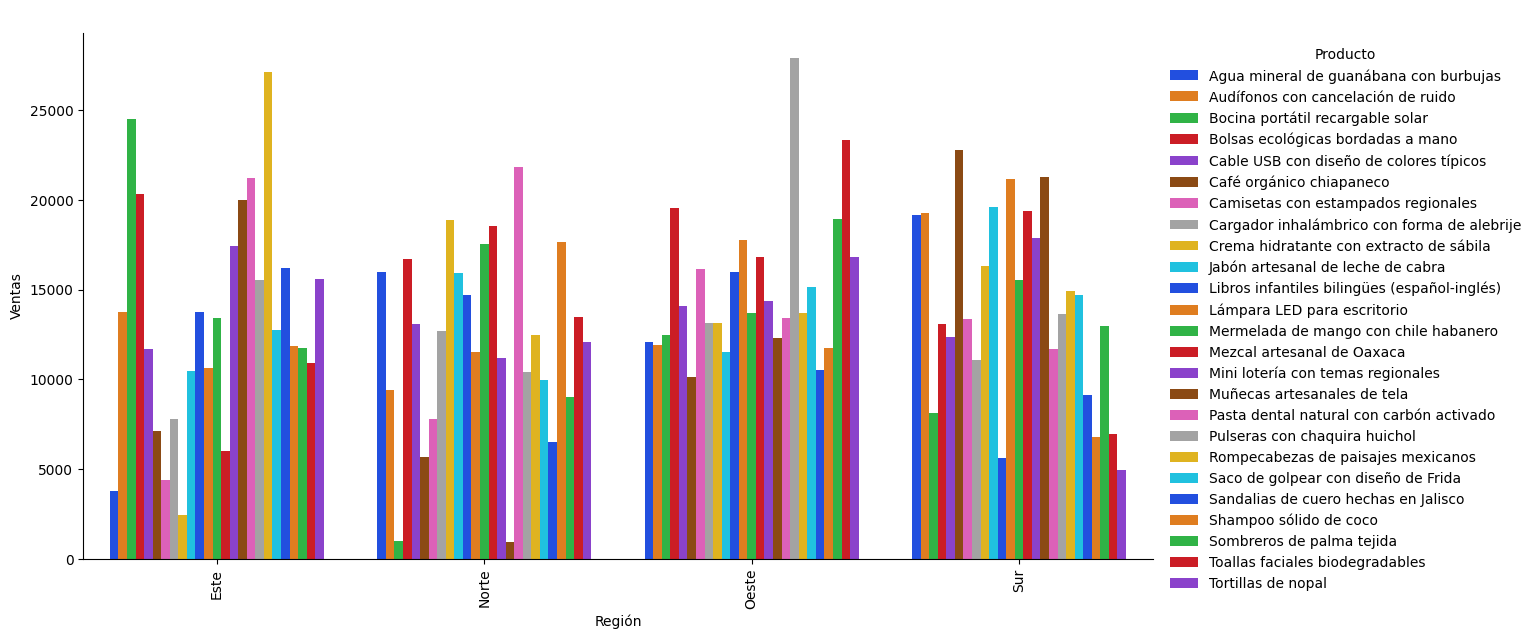

In [8]:

# GRÁFICAS CON SEABORN
# Productos x Región
# Lo transformamos a formato largo (long format)
df_long = prod_reg.melt(
    id_vars='Producto', var_name='Región', value_name='Ventas')
# Gráfica 1
sns.catplot(data=df_long, x='Región', y='Ventas', hue='Producto',
            kind='bar', height=6, aspect=2, palette='bright')
plt.title('Distribución regional de Ventas por Producto', color='white')
plt.xticks(rotation=90)#, color='white')
plt.savefig('../outputs/graficas/productos_por_region.png', dpi=300, bbox_inches='tight')
plt.show()


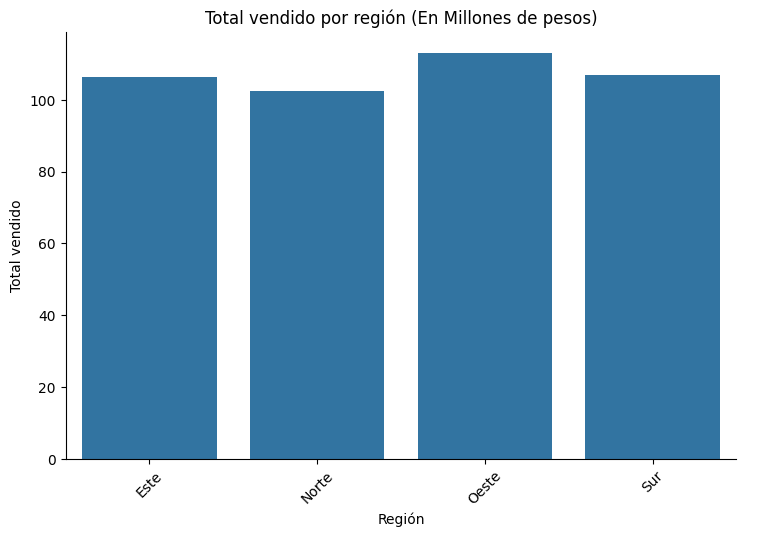

In [9]:

# Ventas x Región
ven_reg = pd.pivot_table(df, values='Total vendido',
                         aggfunc='sum', index='Región').reset_index()
ven_reg['Total vendido'] = ven_reg['Total vendido'].apply(lambda x: x/1e6)
sns.catplot(data=ven_reg, x='Región', y='Total vendido',
            kind='bar', height=5, aspect=1.5)
plt.title('Total vendido por región (En Millones de pesos)')
plt.xticks(rotation=45)
plt.savefig('../outputs/graficas/total_vendido_por_region.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [10]:
ventass = df.groupby(['Mes', 'Región'])['Ventas'].sum().reset_index()
ventass

,Mes,Región,Ventas
0,Abril,Este,25273
1,Abril,Norte,19117
2,Abril,Oeste,15040
3,Abril,Sur,43229
4,Agosto,Este,23259
5,Agosto,Norte,29402
6,Agosto,Oeste,21240
7,Agosto,Sur,28708
8,Diciembre,Este,22035
9,Diciembre,Norte,27829


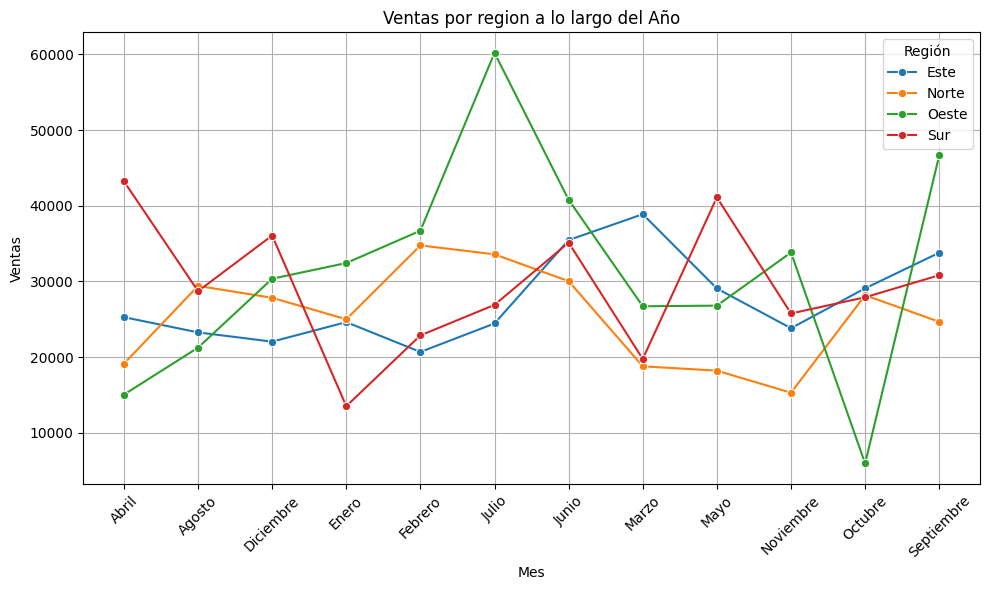

In [11]:

# ventas por mes
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventass, x='Mes', y='Ventas', marker='o', hue = 'Región')
plt.title('Ventas por region a lo largo del Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../outputs/graficas/ventas_por_mes_y_region.png',
            dpi=300, bbox_inches='tight')
plt.show()

           Mes  Ventas  Proporción
3        Enero   95535    7.006822
4      Febrero  114980    8.432976
7        Marzo  104108    7.635591
0        Abril  102659    7.529317
8         Mayo  115157    8.445958
6        Junio  141386   10.369671
5        Julio  145103   10.642286
1       Agosto  102609    7.525650
11  Septiembre  135897    9.967091
10     Octubre   91085    6.680445
9    Noviembre   98666    7.236459
2    Diciembre  116272    8.527735


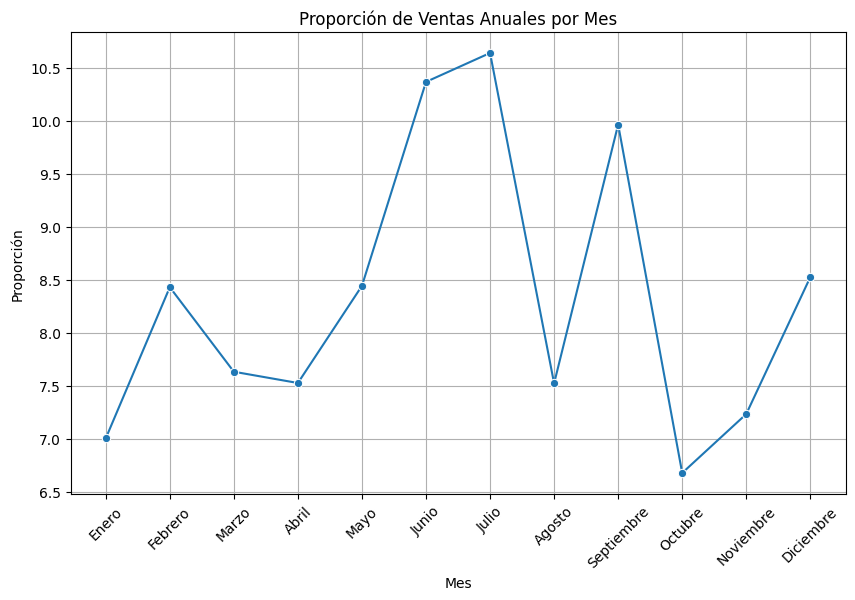

In [12]:
# proporción de ventas anuales por mes
venta_proporcion = venta_mes.copy()
venta_proporcion['Proporción'] = (venta_proporcion['Ventas'] / venta_proporcion['Ventas'].sum()) * 100
print(venta_proporcion)

plt.figure(figsize=(10, 6))
sns.lineplot(venta_proporcion, x='Mes', y='Proporción', marker='o')
plt.grid(True)
plt.xticks(rotation=45)
plt.title('Proporción de Ventas Anuales por Mes')
plt.savefig('../outputs/graficas/proporcion_ventas_por_mes.png',
            dpi=300, bbox_inches='tight')
plt.show()